In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=02449c81b718f98a89fce9f1f613daf9


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 79.47,
  'feels_like': 78.87,
  'temp_min': 77,
  'temp_max': 82,
  'pressure': 1007,
  'humidity': 61},
 'wind': {'speed': 10.29, 'deg': 210},
 'rain': {'1h': 0.25},
 'clouds': {'all': 57},
 'dt': 1593368163,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1593335394,
  'sunset': 1593390304},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 82 61 57 10.29


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 28, 18, 16, 3)

In [12]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-28 18:16:03'

In [13]:
# #Get the City Weather Data from 500+ cities

# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

In [14]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + "i"

In [15]:
#Get the City Weather Data from 500+ cities

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#retrieve the data from the JSON weather response for each city.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | dezful
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | roma
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | sibu
Processing Record 13 of Set 1 | omboue
Processing Record 14 of Set 1 | tlahualilo
City not found. Skipping...
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | gondal
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | auki
Processing Record 21 of Set 1 | tanshui
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | port macquarie
Processing Record 41 of Set 4 | brandon
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | corozal
Processing Record 44 of Set 4 | stolin
Processing Record 45 of Set 4 | waipawa
Processing Record 46 of Set 4 | lethem
Processing Record 47 of Set 4 | daru
Processing Record 48 of Set 4 | novikovo
Processing Record 49 of Set 4 | bandrele
Processing Record 50 of Set 4 | los andes
Processing Record 1 of Set 5 | carutapera
Processing Record 2 of Set 5 | solsvik
City not found. Skipping...
Processing Record 3 of Set 5 | sabha
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | pacora
Processing Record 7 of Set 5 | billings
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | lasa
Processing Record 10 of Set 5 | baghdad
Processing Record 11 of Set 5 | chipinge
Processing Record

Processing Record 27 of Set 8 | salinopolis
Processing Record 28 of Set 8 | sarakhs
Processing Record 29 of Set 8 | coquimbo
Processing Record 30 of Set 8 | blonduos
City not found. Skipping...
Processing Record 31 of Set 8 | great yarmouth
Processing Record 32 of Set 8 | tarudant
City not found. Skipping...
Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | sabya
Processing Record 36 of Set 8 | bilma
Processing Record 37 of Set 8 | havre-saint-pierre
Processing Record 38 of Set 8 | chapleau
Processing Record 39 of Set 8 | rosarito
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | hammerfest
Processing Record 42 of Set 8 | lagoa
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 8 | tooele
Processing Record 46 of Set 8 | margate
Processing Record 47 of Set 8 | luchegorsk
Processing Record 48 of Set 8 | thinadhoo
Pro

Processing Record 13 of Set 12 | el alto
Processing Record 14 of Set 12 | alenquer
Processing Record 15 of Set 12 | canutama
Processing Record 16 of Set 12 | rovaniemi
Processing Record 17 of Set 12 | kandrian
Processing Record 18 of Set 12 | chimbote
Processing Record 19 of Set 12 | solnechnyy
Processing Record 20 of Set 12 | bani walid
Processing Record 21 of Set 12 | shu
Processing Record 22 of Set 12 | kondinskoye
Processing Record 23 of Set 12 | carbonia
Processing Record 24 of Set 12 | miranda
Processing Record 25 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 26 of Set 12 | altamont
Processing Record 27 of Set 12 | ye
City not found. Skipping...
Processing Record 28 of Set 12 | kolpashevo
Processing Record 29 of Set 12 | atar
Processing Record 30 of Set 12 | mudgee
Processing Record 31 of Set 12 | klyuchi
Processing Record 32 of Set 12 | svetlyy
Processing Record 33 of Set 12 | wajir
Processing Record 34 of Set 12 | kapit
Processing Record 35 of Set 12 | flo

In [16]:
len(city_data)

549

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,44.15,100,98,14.79,RU,2020-06-28 18:17:19
1,Chuy,-33.70,-53.46,54.88,61,32,4.59,UY,2020-06-28 18:17:20
2,Dezful,32.38,48.41,96.08,9,0,13.76,IR,2020-06-28 18:17:20
3,Cape Town,-33.93,18.42,60.01,82,75,5.82,ZA,2020-06-28 18:17:20
4,Geraldton,-28.77,114.60,66.20,68,90,21.92,AU,2020-06-28 18:17:21
5,Klaksvik,62.23,-6.59,59.00,67,96,14.99,FO,2020-06-28 18:17:21
6,Nikolskoye,59.70,30.79,64.40,48,0,11.18,RU,2020-06-28 18:17:21
7,Ushuaia,-54.80,-68.30,37.40,94,75,13.87,AR,2020-06-28 18:17:21
8,Roma,43.21,-75.46,78.80,61,75,8.05,US,2020-06-28 18:17:22
9,Vaini,-21.20,-175.20,75.20,94,75,4.70,TO,2020-06-28 18:17:22


In [18]:
# new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [19]:
# new_city_data_df=city_data_df[new_column_order]

In [20]:
# new_city_data_df.head()

In [24]:
#Another way to change columns in a DF
city_data_df=city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [25]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-06-28 18:17:19,73.51,80.55,44.15,100,98,14.79
1,Chuy,UY,2020-06-28 18:17:20,-33.70,-53.46,54.88,61,32,4.59
2,Dezful,IR,2020-06-28 18:17:20,32.38,48.41,96.08,9,0,13.76
3,Cape Town,ZA,2020-06-28 18:17:20,-33.93,18.42,60.01,82,75,5.82
4,Geraldton,AU,2020-06-28 18:17:21,-28.77,114.60,66.20,68,90,21.92


In [27]:
# Set the destination of the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593375825.4147682

In [31]:
today=time.strftime("%x")
today

'06/28/20'

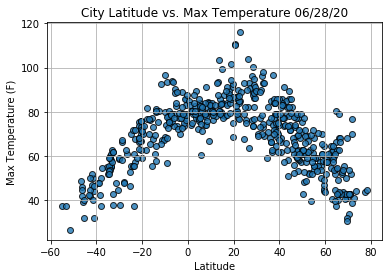

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

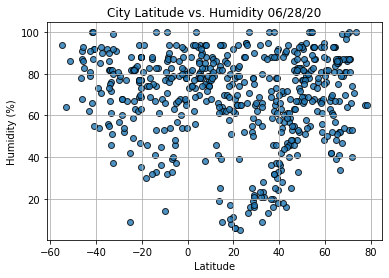

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

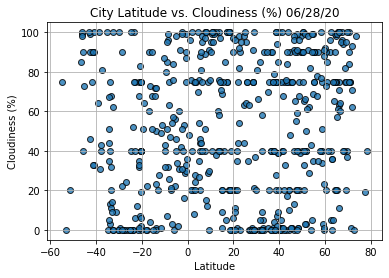

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

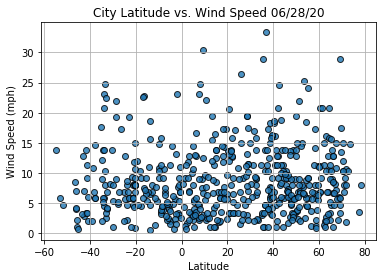

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()